# Vega Doku

Import Vega and convert JS keywords

In [20]:
from vega3 import Vega
import copy
null = None
true = True
false = False

Display Data - Copy Paste Definiton in Vega Constructor
Top-Level Specification: https://vega.github.io/vega/docs/specification/

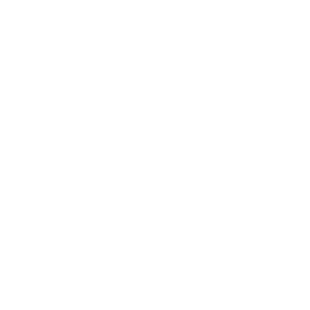

In [21]:
Vega(
    {
      "$schema": "https://vega.github.io/schema/vega/v3.json",
      "width": 300,
      "height": 300,
      "padding": 5,
      "autosize": "pad"
    }
)

# Display some data at pixel positions

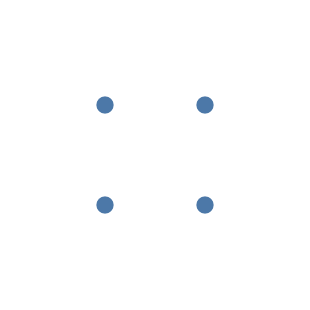

In [22]:
spec= {
        "$schema": "https://vega.github.io/schema/vega/v3.json",
        "width": 300,
        "height": 300,
        "padding": 5,
        "autosize": "pad",
        #All Datasets
        "data":[
            {
                #Unique global identifier
                "name": "points",
                "values":[
                    #Coordinates in pixel 
                    {"label":"point_1", "x":100,"y":100},
                    {"label":"point_2", "x":100,"y":200},
                    {"label":"point_3", "x":200,"y":200},
                    {"label":"point_4", "x":200,"y":100}
                ]
            }
        ],
        #Define how the data should be displayed
        "marks":[
            {
                #Optinal unique name
                "name": "dots",
                #Type (Symbol, Text, Rule/Line....)
                "type": "symbol",
                #Datasource
                "from":{
                    #Name of dataset
                    "data": "points"
                },
                #Properties of mark
                "encode":{
                    #Initial properties
                    "enter":{
                        #Size of point
                        "size":{"value": 300},
                        #Property of symbol
                        "x":{"field":"x"},
                        "y":{"field":"y"},
                    }
                }
            }
        ]
    }
Vega(spec)

### Now let's show the label above each points
Here we add new marker to the marker array of type "text". As text we show the label. Furthermore, we add some offset to show a label above.

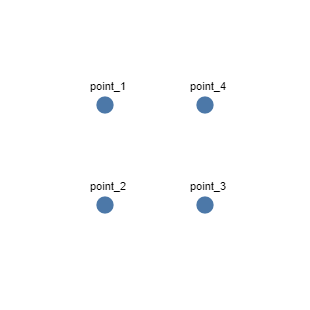

In [23]:
spec2 = copy.deepcopy(spec)
#Append new Mark
spec2["marks"].append(
   {
                "name": "Text",
                "type": "text",
                "from":{
                    "data": "points"
                },
                "encode":{
                    "enter":{
                        "x":{"field":"x"},
                        "y":{"field":"y"},
                        #Property of text
                        "text":{"field":"label"},
                        #Define an verical offset
                        "dy":{"value": -15},
                        "dx":{"value": -15}
                        
                        
                    }
                }
            }
)
Vega(spec2)

### Now lets show some lines connecting the center with each point
Here we utilize the x2 and y2 property to define the origine

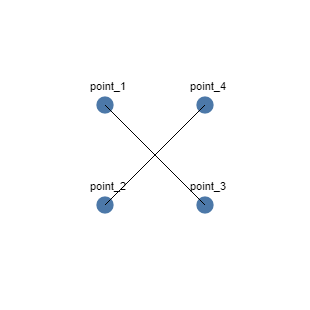

In [24]:
spec3 = copy.deepcopy(spec2)
#Append new Rules
spec3["marks"].append(
   {
                "name": "Rules",
                "type": "rule",
                "from":{
                    "data": "points"
                },
                "encode":{
                    "enter":{
                        "x":{"field":"x"},
                        "y":{"field":"y"},
                        #origin coordinates
                        "x2":{"value":150},
                        "y2":{"value":150}
                        
                    }
                }
            }
)
Vega(spec3)

## Transformation
Now we want to create or label name using data transformationstransformations.
 
FirstFirst, we have to create ana unique identifier for every Point in our data set using the "identifier" transform.transforms. This will add a property specified in "as" which we can access later.
 
Second we have to our label name using "formula" transformation.  
 
In the "expr""export" we can use basic JS syntax like string concatenating, but also a lot of functions defined by vega:Vega: https://vega.github.io/vega/docs/expressions/
The result will be stored in the field specified in "as"
 
 
We can access properties/fields of the data points using "datum"."datum." We use the "index" we created before as well as the x and y coordinates.


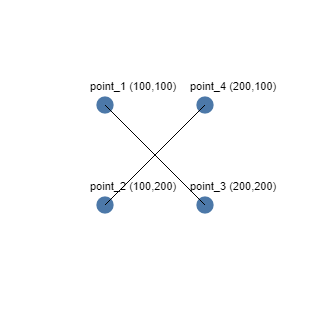

In [25]:
spec4= copy.deepcopy(spec3)


spec4["data"] =[
            {
                "name": "points",
                "values":[
                    {"x":100,"y":100},
                    {"x":100,"y":200},
                    {"x":200,"y":200},
                    {"x":200,"y":100}
                ],
                "transform":[
                    {"type": "identifier", "as": "index"},
                    #Now we create our own label display index and coordinates
                    {"type": "formula", "expr":"'point_' + datum.index + ' (' + datum.x + ','+ datum.y+')'", "as": "label"},
                ]
            }
        ]



Vega(spec4)

### Tooltip
Next we want to show the relevant information in a tooltip instead in a text.
First we delete the text and add the "tooltip" property. Here we access the point by the "datum" signal.

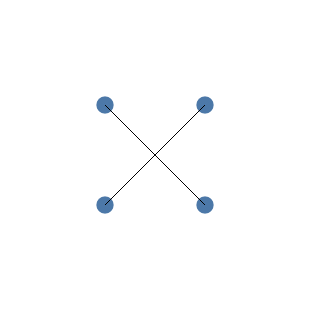

In [26]:
spec5= copy.deepcopy(spec4)
#delete text
del spec5["marks"][1]
#lets remove the text and just show all data using a tooltip 
spec5["marks"][0]=      {
                "name": "dots",
                "type": "symbol",
                "from":{
                    "data": "points"
                },
                "encode":{
                    "enter":{
                        "size":{"value": 300},
                        "x":{"field":"x"},
                        "y":{"field":"y"},
                        #here we need to use singal instead of "value" to access "datum" and write JS code
                        "tooltip":{"signal":"datum"}
                    }
                }
            }



Vega(spec5)

## Interactions
Next we will define some basic interactions. We use the simple defintion we used before.
First we have to define two signals which alway update when the mouse move. We always store the x and y coordinates of mouse using the build in x() and y() function.

In the transform of the marks we can access these signals and update the x and y coordinate of each point.

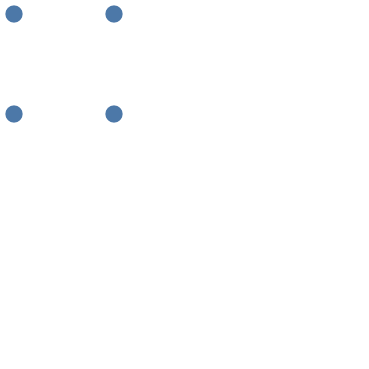

In [27]:
spec6= {
        "$schema": "https://vega.github.io/schema/vega/v3.json",
        "width": 300,
        "height": 300,
        "padding": 5,
        "autosize": "pad",
        "data":[
            {
                "name": "points",
                "values":[
                    {"label":"point_1", "x":100,"y":100},
                    {"label":"point_2", "x":100,"y":200},
                    {"label":"point_3", "x":200,"y":200},
                    {"label":"point_3", "x":200,"y":100}
                ]
            }
        ],
        "signals":[   
            #define signals that updates when mouse moves to the current x and y of the cursor
            {
              "name": "yPos",
              "value": 0,
              "on": [
                {
                  "events": "window:mousemove",
                  "update": "y()"
                }
              ]
            },
             {
              "name": "xPos",
              "value": 0,
              "on": [
                {
                  "events": "window:mousemove",
                  "update": "x()"
                }
              ]
            }  
        ],
        "marks":[
            {
                "name": "dots",
                "type": "symbol",
                "from":{
                    "data": "points"
                },
                "encode":{
                    "enter":{
                        "size":{"value": 300},
                        "x":{"field":"x"},
                        "y":{"field":"y"},
                    }
                },
                "transform":[
                    
                    #datum = mark; datum.datum = underlying node
                    #mark has no label only node has
                    {"type":"formula", "expr":"yPos-150+datum.datum.y", "as": "y"},
                    {"type":"formula", "expr":"xPos-150+datum.datum.x", "as": "x"}
                ]
            }
        ]
    }
Vega(spec6)

Here we only interact with one certain point. Later we want to define this point manually by clicking.

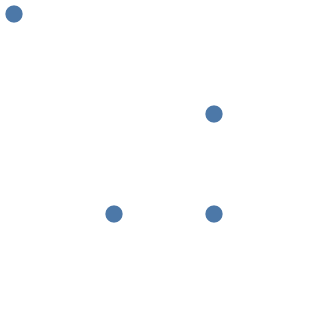

In [28]:
spec6= {
        "$schema": "https://vega.github.io/schema/vega/v3.json",
        "width": 300,
        "height": 300,
        "padding": 5,
        "autosize": "pad",
        "data":[
            {
                "name": "points",
                "values":[
                    {"label":"point_1", "x":100,"y":100},
                    {"label":"point_2", "x":100,"y":200},
                    {"label":"point_3", "x":200,"y":200},
                    {"label":"point_3", "x":200,"y":100}
                ]
            }
        ],
        "signals":[          
            {
              "name": "yPos",
              "value": 0,
              "on": [
                {
                  "events": "window:mousemove",
                  "update": "y()"
                }
              ]
            },
             {
              "name": "xPos",
              "value": 0,
              "on": [
                {
                  "events": "window:mousemove",
                  "update": "x()"
                }
              ]
            }  
        ],
        "marks":[
            {
                "name": "dots",
                "type": "symbol",
                "from":{
                    "data": "points"
                },
                "encode":{
                    "enter":{
                        "size":{"value": 300},
                        "x":{"field":"x"},
                        "y":{"field":"y"},
                        "tooltip":{"signal":"datum"}
                    }
                },
                "transform":[
                    #only use dot wirh label 'point_1'
                    #datum = mark; datum.datum = underlying node
                    #mark has no label only node has
                    {"type":"formula", "expr":"datum.datum.label==='point_1'?yPos:datum.y", "as": "y"},
                    {"type":"formula", "expr":"datum.datum.label==='point_1'?xPos:datum.x", "as": "x"}
                ]
            }
        ]
    }
Vega(spec6)

Here we use the definition before and add a signal which updates when clicked on one point. 
This signal we access in the transform of the marks and check if the label is equal with the clicked one.

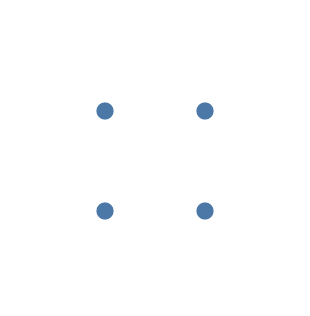

In [29]:
spec7= {
        "$schema": "https://vega.github.io/schema/vega/v3.json",
        "width": 300,
        "height": 300,
        "padding": 5,
        "autosize": "pad",
        "data":[
            {
                "name": "points",
                "values":[
                    {"label":"point_1", "x":100,"y":100},
                    {"label":"point_2", "x":100,"y":200},
                    {"label":"point_3", "x":200,"y":200},
                    {"label":"point_4", "x":200,"y":100}
                ]
            }
        ],
        "signals":[          
            {
              "name": "yPos",
              "value": 0,
              "on": [
                {
                  "events": "window:mousemove",
                  "update": "y()"
                }
              ]
            },
             {
              "name": "xPos",
              "value": 0,
              "on": [
                {
                  "events": "window:mousemove",
                  "update": "x()"
                }
              ]
            },
             {
              "name": "active",
              "value": null,
              "on": [
                {
                  "events": "@dots:mousedown",
                  "update": "datum"
                },
                {
                  "events": "window:mouseup",
                  "update": "null"
                }
              ]
            }
        ],
        "marks":[
            {
                "name": "dots",
                "type": "symbol",
                "from":{
                    "data": "points"
                },
                "encode":{
                    "enter":{
                        "size":{"value": 300},
                        "x":{"field":"x"},
                        "y":{"field":"y"}
                    }
                },
                "transform":[
                    {"type":"formula", "expr":"active&&datum.datum.label===active.label?yPos:datum.y", "as": "y"},
                    {"type":"formula", "expr":"active&&datum.datum.label===active.label?xPos:datum.x", "as": "x"}
                ]
            },            
            {
              "type": "text",
              "encode": {
                "update": {
                    "dy":{"value":10},
                    "fontSize":{"value": 20}
                }
              },
                "transform":[
                    #Log active point
                    {"type":"formula", "expr":"active?active.label:null", "as": "text"}
                ]
            }
        ]
            }
Vega(spec7)

Switch from pixel coordinates to our own coordinate system
-1 to 1

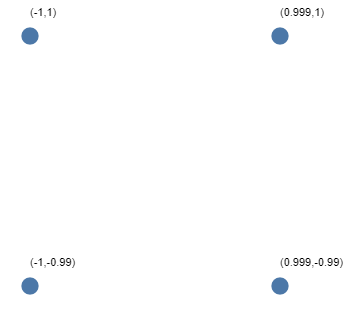

In [30]:
spec7= {
        "$schema": "https://vega.github.io/schema/vega/v3.json",
        "width": 300,
        "height": 300,
        "padding": 5,
        "autosize": "pad",
        "data":[
            {
                "name": "points",
                "values":[
                    {"label":"point_1", "x":-1,"y":-1},
                    {"label":"point_2", "x":-1,"y":1},
                    {"label":"point_3", "x":1,"y":1},
                    {"label":"point_4", "x":1,"y":-1}
                ]
            }
        ],
        "signals":[
            {
              "name": "yPos",
              "value": 0,
              "on": [
                {
                  "events": "window:mousemove",
                  "update": "y()"
                }
              ]
            },
             {
              "name": "xPos",
              "value": 0,
              "on": [
                {
                  "events": "window:mousemove",
                  "update": "x()"
                }
              ]
            },
             {
              "name": "active",
              "value": null,
              "on": [
                {
                  "events": "@dots:mousedown",
                  "update": "datum"
                },
                {
                  "events": "window:mouseup",
                  "update": "null"
                }
              ]
            }
        ],
      "scales": [
        {
          "name": "x",
          "type": "linear",
          "round": true,
          "nice": true,
          "zero": true,
          "domain": [
            -1.1,
            1.1
          ],
          "range": "width"
        },
        {
          "name": "y",
          "type": "linear",
          "round": true,
          "nice": true,
          "zero": true,
          "domain": [
            -1.1,
            1.1
          ],
          "range": "height"
        }
      ],
        "marks":[
            {
                "name": "dots",
                "type": "symbol",
                "from":{
                    "data": "points"
                },
                "encode":{
                    "enter":{
                        "size":{"value": 300},
                        #Use scales we defined above
                        "x":{"scale":"x", "field":"x"},
                        "y":{"scale":"y", "field":"y"}
                    }
                },
                "transform":[
                    {"type":"formula", "expr":"active&&datum.datum.label===active.label?yPos:datum.y", "as": "y"},
                    {"type":"formula", "expr":"active&&datum.datum.label===active.label?xPos:datum.x", "as": "x"}
                ]
            },
            {
                "name": "co",
                "type": "text",
                "from":{
                    "data": "points"
                },
                "encode":{
                    "enter":{
                        "size":{"value": 300},
                        #Use scales we defined above
                        "x":{"scale":"x", "field":"x"},
                        "y":{"scale":"y", "field":"y"},
                        "dy":{"value":-20}
                    }
                },
                "transform":[
                    {"type":"formula", "expr":"active&&datum.datum.label===active.label?yPos:datum.y", "as": "y"},
                    {"type":"formula", "expr":"active&&datum.datum.label===active.label?xPos:datum.x", "as": "x"},
                    #scale back to our scales
                    {"type":"formula", "expr":"'('+substring(invert('x',datum.x),0,5)+','+substring(invert('y',datum.y),0,5)+')'", "as": "text"},
                ]
            },            
            {
              "type": "text",
              "encode": {
                "update": {
                    "dy":{"value":10},
                    "fontSize":{"value": 20}
                }
              },
                "transform":[
                    #Log active point
                    {"type":"formula", "expr":"active?active.label:null", "as": "text"}
                ]
            }
        ]
            }
Vega(spec7)

Now lets do the same things for the lines

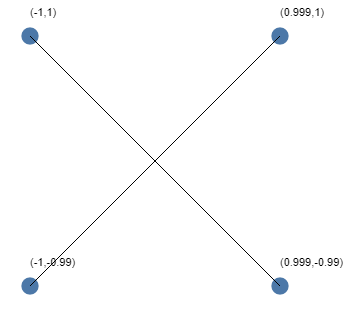

In [31]:
spec8 = copy.deepcopy(spec7)
spec8["marks"].append({
    
                "name": "rule",
                "type": "rule",
                "from":{
                    "data": "points"
                },
                "encode":{
                    "enter":{
                        "x":{"scale":"x", "field":"x"},
                        "y":{"scale":"y", "field":"y"},
                        "x2":{"scale":"y", "value":0},
                        "y2":{"scale":"y", "value":0}
                    }
                },
                "transform":[
                    {"type":"formula", "expr":"active&&datum.datum.label===active.label?yPos:datum.y", "as": "y"},
                    {"type":"formula", "expr":"active&&datum.datum.label===active.label?xPos:datum.x", "as": "x"}
                ]
            })


Vega(spec8)

## Create Radial Chart

1. Calculate angle for every value displayed
2. Calcualte x and y from angle (x = cos(angle)*value; y = sin(angle)*value) 
3. Calcualte slope (m = y/x)
4. Show axis - Draw Line from (0,0) to (cos(angle),sin(angle))
5. Show points with clalculated (x,y)

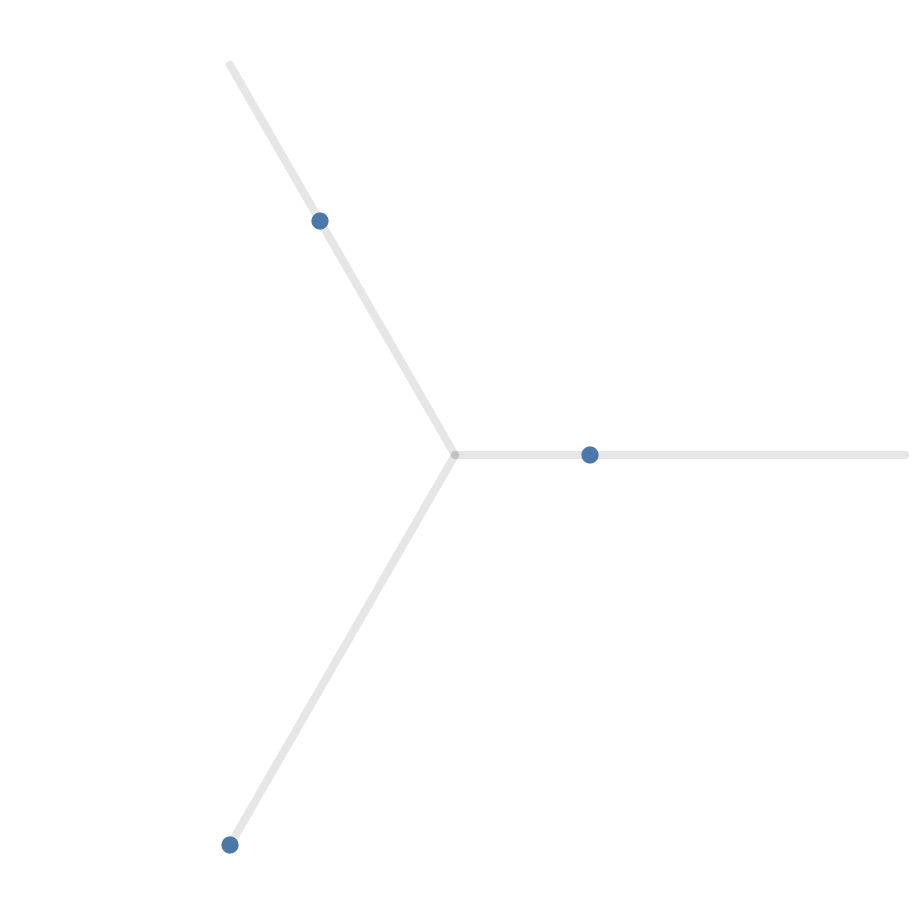

In [34]:

spec9 = {
  "$schema": "https://vega.github.io/schema/vega/v3.json",
  "width": 900,
  "height": 900,
  "padding": 5,
  "autosize": "pad",
  "signals": [],
  "data":[]
}


#add scales
spec9["scales"] =[
        {
          "name": "x",
          "type": "linear",
          "round": true,
          "nice": true,
          "zero": true,
          "domain": [
            -1,
            1
          ],
          "range": "width"
        },
        {
          "name": "y",
          "type": "linear",
          "round": true,
          "nice": true,
          "zero": true,
          "domain": [
            -1,
            1
          ],
          "range": "height"
        }
      ]
       

#Add our values
spec9["data"] = [
    {
        "name": "node-data",
        "values": [0.3,0.6,1],
        "transform":[
            {"type": "identifier", "as": "index"}
        ]
    },
    {
        "name": "nodes",
        #copy data from node-data
        "source": "node-data",
        "transform":[
            {"type": "identifier", "as": "index"}
        ],
        "transform":[
            {
              "type": "formula",
              #calculate angle for radial chart
              "expr": "(360/data('node-data').length)*(datum.index-data('node-data')[0].index)*PI/180",
              "as": "angle"
            },
            {
              "type": "formula",
              #calculate x from angle
              "expr": "cos(datum.angle)*datum.data",
              "as": "x"
            },
            {
              "type": "formula",
              #calculate y from angle
              "expr": "sin(datum.angle)*datum.data",
              "as": "y"
            },
            #calculate slope
            {
              "type": "formula",
              "expr": "datum.x!=0?-datum.y/datum.x:99999999999",
              "as": "m"
            }
        ]
    }
]

spec9["marks"] = [
    
#Add our axis for every node
    {
      "type": "rule",
      "name": "axis",
      "from": {
        "data": "nodes"
      },
      "encode": {
        "update": {
          "opacity": {
            "value": 0.2
          },
          "stroke": {
            "value": "grey"
          },
          "strokeWidth": {
            "value": 8
          },
          "strokeCap": {
            "value": "round"
          },
          "x": {
            "scale": "x",
            "signal": "cos(datum.angle)"
          },
          "y": {
            "scale": "y",
            "signal": "sin(datum.angle)"
          },
          "x2": {
            "scale": "x",
            "value": 0
          },
          "y2": {
            "scale": "y",
            "value": 0
          }
        }
      }
    },
     {
      "type": "symbol",
      "name": "marks",
      "from": {
        "data": "nodes"
      },
      "encode": {
        "update": {
            
           "size":{"value": 300},
            "x": {
            "scale": "x",
            "field": "x"
          },
            "tooltip":{
                "signal": "datum"
            },
          "y": {
            "scale": "y",
            "field": "y"
          }
        }
      }
    }
]

Vega(spec9)


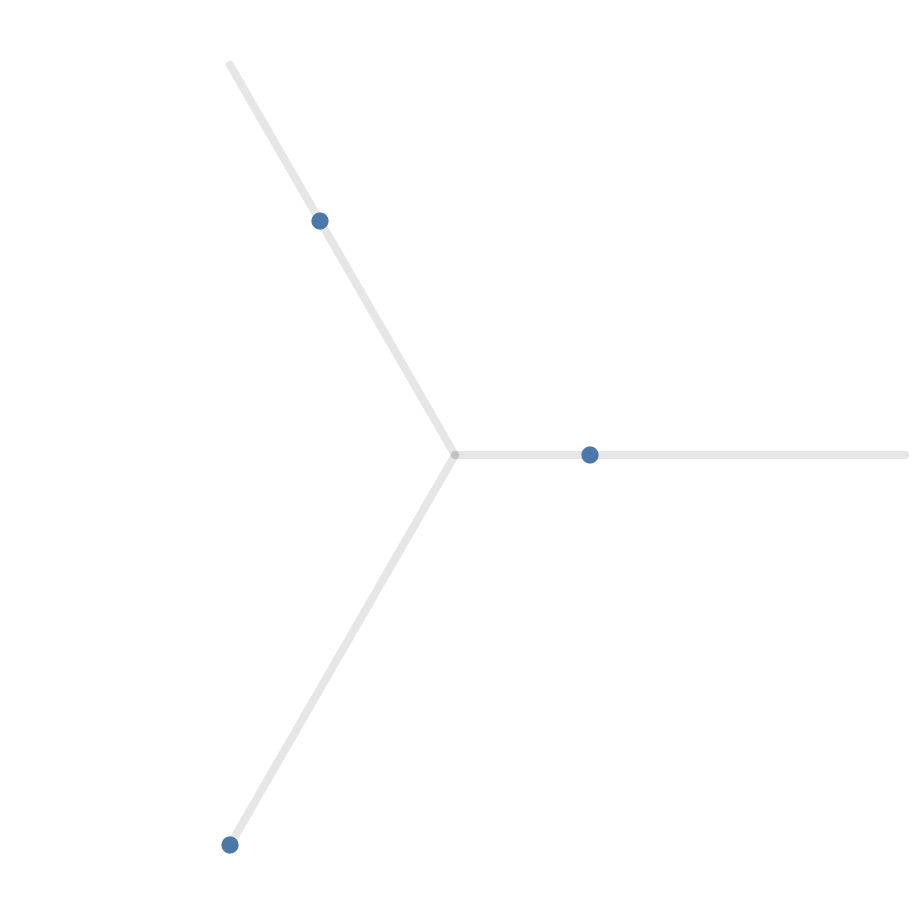

In [35]:
spec10 = copy.deepcopy(spec9)

#Add signal for onclick, xPos, yPos
spec10["signals"] =   [
    {
      "name": "active",
      "value": null,
      "on": [
        {
          "events": "@marks:mousedown",
          "update": "datum"
        },
        {
          "events": "window:mouseup",
          "update": "null"
        }
      ]
    },
    {
      "name": "xPos",
      "value": 0,
      "on": [
        {
          "events": "window:mousemove",
          "update": "x()"
        }
      ]
    },
    {
      "name": "yPos",
      "value": 0,
      "on": [
        {
          "events": "window:mousemove",
          "update": "y()"
        }
      ]
    },
    
    {
      "name": "infinity",
      "value": "99999999999"
    }
]
#Add interaction
spec10["marks"][1]["transform"]= [
      {
          "type": "formula",
          "expr": "active&&active.index===datum.datum.index?xPos:datum.x",
          "as": "x"
        },
        {
          "type": "formula",
        #calculate 
          "expr": "active&&active.index===datum.datum.index?scale('x',invert('x',xPos)*datum.datum.m):datum.y",
          "as": "y"
        }
]
Vega(spec10)

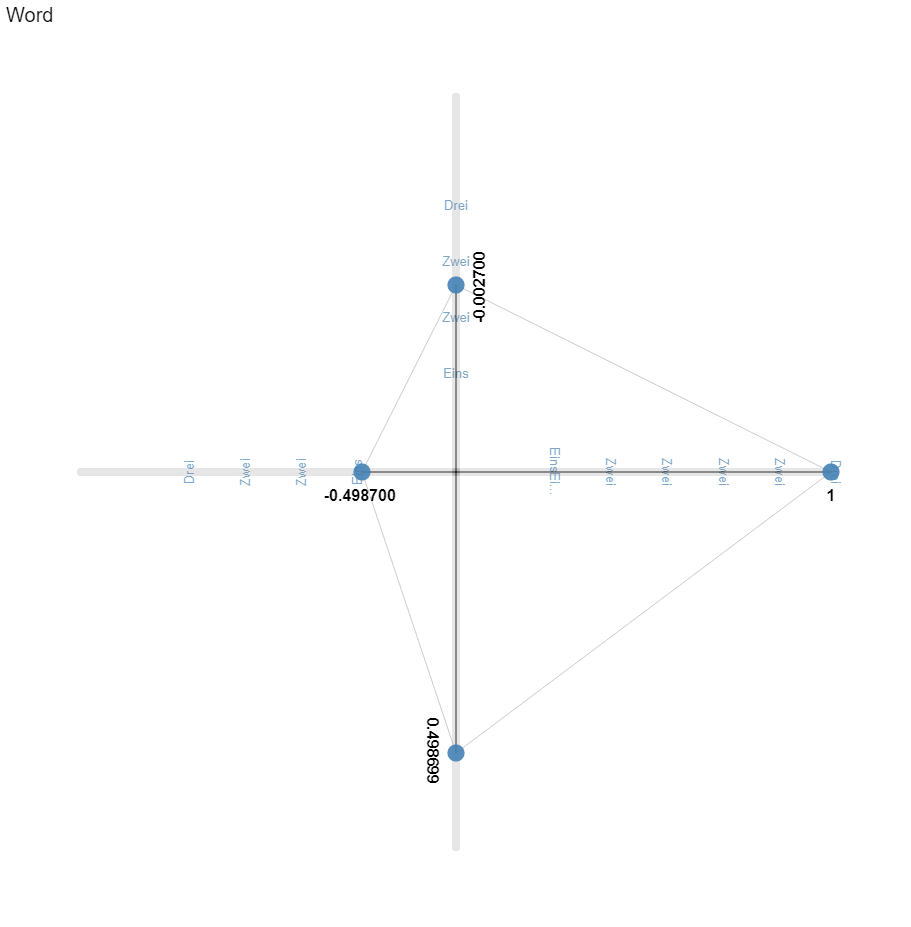

In [36]:
Vega(
{
  "$schema": "https://vega.github.io/schema/vega/v3.json",
  "width": 900,
  "height": 900,
  "padding": 5,
  "autosize": "pad",
  "signals": [
    {
      "name": "active",
      "value": null,
      "on": [
        {
          "events": "@marks:mousedown",
          "update": "datum"
        },
        {
          "events": "window:mouseup",
          "update": "null"
        }
      ]
    },
    {
      "name": "hover",
      "value": null,
      "on": [
        {
          "events": "@marks:mouseover",
          "update": "datum"
        },
        {
          "events": "@marks:mouseout",
          "update": "null"
        }
      ]
    },
    {
      "name": "infinity",
      "value": "99999999999"
    },
    {
      "name": "xPos",
      "value": 0,
      "on": [
        {
          "events": "window:mousemove",
          "update": "x()"
        }
      ]
    },
    {
      "name": "yPos",
      "value": 0,
      "on": [
        {
          "events": "window:mousemove",
          "update": "y()"
        }
      ]
    }
  ],
  "data": [
    {
      "name": "word-data",
      "values": [
        [
          "EinsEinsEinsEins",
          "Zwei",
          "Zwei",
          "Zwei",
          "Zwei",
          "Drei"
        ],
        [
          "Eins",
          "Zwei",
          "Zwei",
          "Drei"
        ],
        [
          "Eins",
          "Zwei",
          "Zwei",
          "Drei"
        ]
      ]
    },
    {
      "name": "node-data",
      "values": [
        1,
        0,
        -0.5,
        0.5
      ],
      "transform": [
        {
          "type": "identifier",
          "as": "index"
        },
        {
          "type": "formula",
          "expr": "(datum.data+1)/2",
          "as": "val"
        },
        {
          "type": "formula",
          "expr": "[-0.5, -0.2, 0.1, 0.4, 0.7, 1]",
          "as": "vals"
        }
      ]
    },
    {
      "name": "nodes",
      "source": [
        "node-data"
      ],
      "transform": [
        {
          "type": "formula",
          "expr": "data('word-data')[(datum.index-data('node-data')[0].index)]||[]",
          "as": "words"
        },
        {
          "type": "formula",
          "expr": "(360/data('node-data').length)*(datum.index-data('node-data')[0].index)",
          "as": "angleDeg"
        },
        {
          "type": "formula",
          "expr": "(360/data('node-data').length)*(datum.index-data('node-data')[0].index)*PI/180",
          "as": "angle"
        },
        {
          "type": "formula",
          "expr": "cos(datum.angle)*datum.val",
          "as": "x"
        },
        {
          "type": "formula",
          "expr": "sin(datum.angle)*datum.val",
          "as": "y"
        },
        {
          "type": "formula",
          "expr": "datum.x!=0?-datum.y/datum.x:infinity",
          "as": "m"
        },
        {
          "type": "formula",
          "expr": "abs(datum.m)>1",
          "as": "isSteep"
        }
      ]
    },
    {
      "source": "nodes",
      "name": "words",
      "vals": [],
      "transform": [
        {
          "type": "flatten",
          "fields": [
            "words",
            "vals"
          ]
        },
        {
          "type": "formula",
          "expr": "cos(datum.angle)*(datum.vals+ 1)/2",
          "as": "x"
        },
        {
          "type": "formula",
          "expr": "sin(datum.angle)*(datum.vals+ 1)/2",
          "as": "y"
        }
      ]
    },
    {
      "name": "edges-circle",
      "source": "nodes",
      "transform": [
        {
          "type": "formula",
          "expr": "datum.index - data('node-data')[0].index",
          "as": "source"
        },
        {
          "type": "formula",
          "expr": "(datum.index+1- data('node-data')[0].index) % data('node-data').length",
          "as": "target"
        }
      ]
    },
    {
      "name": "edges",
      "source": [
        "edges-circle"
      ]
    },
    {
      "name": "closest-word",
      "values": [
        "Word"
      ]
    }
  ],
  "scales": [
    {
      "name": "x",
      "type": "linear",
      "round": true,
      "nice": true,
      "zero": true,
      "domain": [
        -1.1,
        1.1
      ],
      "range": "width"
    },
    {
      "name": "y",
      "type": "linear",
      "round": true,
      "nice": true,
      "zero": true,
      "domain": [
        -1.1,
        1.1
      ],
      "range": "height"
    }
  ],
  "marks": [
    {
      "name": "marks",
      "type": "symbol",
      "from": {
        "data": "nodes"
      },
      "zindex": 1,
      "encode": {
        "enter": {
          "opacity": {
            "value": 0.9
          },
          "cursor": {
            "value": "pointer"
          },
          "x2": {
            "scale": "x",
            "value": 0
          },
          "y2": {
            "scale": "y",
            "value": 0
          },
          "fill": {
            "value": "steelblue"
          }
        },
        "update": {
          "shape": {
            "value": "circle"
          },
          "size": {
            "value": 300
          },
          "x": {
            "scale": "x",
            "field": "x"
          },
          "y": {
            "scale": "y",
            "field": "y"
          }
        }
      },
      "transform": [
        {
          "type": "formula",
          "expr": "active&&active.index===datum.datum.index?(active.isSteep?scale('y',invert('y',yPos)/datum.datum.m):xPos):datum.x",
          "as": "x"
        },
        {
          "type": "formula",
          "expr": "active&&active.index===datum.datum.index?(active.isSteep?yPos:scale('x',invert('x',xPos)*datum.datum.m)):datum.y",
          "as": "y"
        },
        {
          "type": "formula",
          "expr": "active&&active.index===datum.datum.index||hover&&hover.index===datum.datum.index?1:0.9",
          "as": "opacity"
        },
        {
          "type": "formula",
          "expr": "active&&active.index===datum.datum.index||hover&&hover.index===datum.datum.index?'black':'transparent'",
          "as": "stroke"
        },
        {
          "type": "formula",
          "expr": "sqrt(pow(invert('x',datum.x),2)+pow(invert('y',datum.y),2))*2-1",
          "as": "value"
        },
        {
          "type": "force",
          "alpha": 0,
          "forces": [
            {
              "force": "link",
              "links": "edges-circle",
              "strength": 0
            }
          ]
        }
      ]
    },
    {
      "type": "path",
      "from": {
        "data": "edges-circle"
      },
      "encode": {
        "update": {
          "strokeWidth": {
            "value": 1
          },
          "stroke": {
            "value": "#ccc"
          }
        }
      },
      "interactive": false,
      "transform": [
        {
          "type": "linkpath",
          "shape": "line",
          "sourceX": "datum.source.x",
          "sourceY": "datum.source.y",
          "targetX": "datum.target.x",
          "targetY": "datum.target.y"
        }
      ]
    },
    {
      "type": "text",
      "name": "text",
      "from": {
        "data": "nodes"
      },
      "encode": {
        "enter": {
          "z-index": 2,
          "fill": {
            "value": "black"
          },
          "fontWeight":{
            "value": "600"
          },
          "fontSize": {
            "value": 16
          }
        },
        "update": {
          "limit":{
            "value": 80
          },
          "ellipsis":{
            "value": " "
          },
          "x": {
            "scale": "x",
            "field": "x"
          },
          "y": {
            "scale": "y",
            "field": "y"
          },
          "dy": {
            "value": 29
          },
          "align": {
            "value": "center"
          },
          "angle": {
            "signal": "datum.angleDeg>90&&datum.angleDeg<270?360-datum.angleDeg-180:360-datum.angleDeg"
          }
        }
      },
      "transform": [
        {
          "type": "formula",
          "expr": "active&&active.index===datum.datum.index?(active.isSteep?scale('y',invert('y',yPos)/datum.datum.m):xPos):datum.x",
          "as": "x"
        },
        {
          "type": "formula",
          "expr": "active&&active.index===datum.datum.index?(active.isSteep?yPos:scale('x',invert('x',xPos)*datum.datum.m)):datum.y",
          "as": "y"
        },
        {
          "type": "formula",
          "expr": "round(10000*sqrt(pow(invert('x',datum.x),2)+pow(invert('y',datum.y),2))*2)/10000-1",
          "as": "text"
        },
        {
          "type": "formula",
          "expr": "datum.datum.angleDeg>90&&datum.datum.angleDeg<270?360-datum.datum.angleDeg-180:360-datum.datum.angleDeg",
          "as": "angle"
        }
      ]
    },
    {
      "type": "text",
      "from": {
        "data": "words"
      },
      "encode": {
        "enter": {
          "z-index": 1,
          "x": {
            "scale": "x",
            "field": "x"
          },
          "y": {
            "scale": "y",
            "field": "y"
          },
          "fill": {
            "value": "steelblue"
          }
        },
        "update": {
          "opacity": {
            "value": 0.7
          },
          "limit":{
            "signal": "((datum.vals+1)/2)*200"
          },
          "align": {
            "value": "center"
          },
          "angle": {
            "signal": "datum.angleDeg>180&&datum.angleDeg<360?360-datum.angleDeg-90:360-datum.angleDeg+90"
          },
          "text": {
            "signal": "datum.words"
          },
          "fontSize": {
            "value": 13
          },
          "fill": {
            "value": "steelblue"
          },
          "dy":{
            "value": 0
          }
        },
        "hover": {
          "opacity": {
            "value": 1
          },
          "fontSize": {
            "value": 30
          },

          "limit":{
            "value": 80000
          },
          "angle":{
            "value": 0
          },
          "fill": {
            "value": "black"
          },
          "dy":{
            "value": 10
          }
        }
      },
      "transform": []
    },
    {
      "type": "rule",
      "from": {
        "data": "nodes"
      },
      "encode": {
        "update": {
          "opacity": {
            "value": 0.2
          },
          "stroke": {
            "value": "grey"
          },
          "strokeWidth": {
            "value": 8
          },
          "strokeCap": {
            "value": "round"
          },
          "x": {
            "scale": "x",
            "signal": "cos(datum.angle)"
          },
          "y": {
            "scale": "y",
            "signal": "sin(datum.angle)"
          },
          "x2": {
            "scale": "x",
            "value": 0
          },
          "y2": {
            "scale": "y",
            "value": 0
          }
        }
      }
    },
    {
      "type": "rule",
      "from": {
        "data": "nodes"
      },
      "encode": {
        "update": {
          "opacity": {
            "value": 0.4
          },
          "stroke": {
            "value": "black"
          },
          "strokeWidth": {
            "value": 2
          },
          "strokeCap": {
            "value": "round"
          },
          "x": {
            "scale": "x",
            "field": "x"
          },
          "y": {
            "scale": "y",
            "field": "y"
          },
          "x2": {
            "scale": "x",
            "value": 0
          },
          "y2": {
            "scale": "y",
            "value": 0
          }
        }
      },
      "transform": [
        {
          "type": "formula",
          "expr": "active&&active.index===datum.datum.index?(active.isSteep?scale('y',invert('y',yPos)/datum.datum.m):xPos):datum.x",
          "as": "x"
        },
        {
          "type": "formula",
          "expr": "active&&active.index===datum.datum.index?(active.isSteep?yPos:scale('x',invert('x',xPos)*datum.datum.m)):datum.y",
          "as": "y"
        }
      ]
    },
    {
      "type": "text",
      "from": {
        "data": "closest-word"
      },
      "encode": {
        "update": {
          "text": {
            "signal": "datum.data"
          },
          "fontSize":{
            "value": 20
          }
        }
      }
    }
  ]
}
)